In [74]:
#https://towardsdatascience.com/playing-with-time-series-data-in-python-959e2485bff8
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [20]:
df = pd.read_excel("Ventes.xlsx")

### Data Preprocessing

In [21]:
Electromenager  = df.loc[df['Categorie'] == 'Electromenager']
MesCourses      = df.loc[df['Categorie'] == 'MesCourses']

According to our data, there were way more number of sales from Office Supplies than from Furniture over the years.


In [22]:
Electromenager.shape, MesCourses.shape

((2121, 22), (6026, 22))

In [23]:
cols = ['Unnamed: 0','Identifiant', 'Num_Commande', 
        'Expedition_Date', 'Expedition_type', 
        'Identifiant_client', 'Nom_client', 
        'Type_client', 'Pays', 
        'Ville','Province', 
        'Code_postal', 'Region',
        'Id_produit', 'Categorie', 
        'Sous_categorie', 'Nom_produit',
        'Quantite', 'Remise',
        'Benefice']

Electromenager.drop(cols, axis=1, inplace=True)

In [24]:
cols = ['Unnamed: 0','Identifiant', 'Num_Commande', 
        'Expedition_Date', 'Expedition_type', 
        'Identifiant_client', 'Nom_client', 
        'Type_client', 'Pays', 
        'Ville','Province', 
        'Code_postal', 'Region',
        'Id_produit', 'Categorie', 
        'Sous_categorie', 'Nom_produit',
        'Quantite', 'Remise',
        'Benefice']

MesCourses.drop(cols, axis=1, inplace=True)

In [30]:
Electromenager.isnull().sum()

Date_Commande    0
Montant          0
dtype: int64

In [26]:
MesCourses.isnull().sum()

Date_Commande    0
Montant          0
dtype: int64

In [27]:
Electromenager  = Electromenager.sort_values('Date_Commande')
MesCourses      = MesCourses.sort_values('Date_Commande') 

In [28]:
Electromenager  = Electromenager.groupby('Date_Commande')['Montant'].sum().reset_index()
MesCourses      = MesCourses.groupby('Date_Commande')['Montant'].sum().reset_index()

In [29]:
MesCourses.head() 

,Date_Commande,Montant
0,2014-01-03,16.448
1,2014-01-04,288.060
2,2014-01-05,19.536
3,2014-01-06,685.340
4,2014-01-07,10.430


# Data exploration

On fait comparer les ventes de deux catégories au cours de la même période. Cela signifie que nous allons combiner deux bases de données en une seule et tracer les séries chronologiques de ces deux catégories en un seul tracé.

In [31]:
Electromenager             = Electromenager.set_index('Date_Commande')

In [32]:
MesCourses                 = MesCourses.set_index('Date_Commande')

In [33]:
y_Electromenager           = Electromenager['Montant'].resample('MS').mean()
y_MesCourses               = MesCourses['Montant'].resample('MS').mean()

In [34]:
Electromenager             = pd.DataFrame({'Date_Commande':y_Electromenager.index, 'Montant':y_Electromenager.values})
MesCourses                 = pd.DataFrame({'Date_Commande':y_MesCourses.index, 'Montant': y_MesCourses.values})

In [35]:
store                      = Electromenager.merge(MesCourses, how='inner', on='Date_Commande')
store.rename(columns       = {'Montant_x': 'Electromenager_ventes', 'Montant_y': 'MesCourses_ventes'}, inplace=True)
store

,Date_Commande,Electromenager_ventes,MesCourses_ventes
0,2014-01-01,480.194231,285.357647
1,2014-02-01,367.931600,63.042588
2,2014-03-01,857.291529,391.176318
3,2014-04-01,567.488357,464.794750
4,2014-05-01,432.049187,324.346545
5,2014-06-01,695.059242,588.774409
6,2014-07-01,601.169500,756.060400
7,2014-08-01,457.521656,541.879143
8,2014-09-01,992.353367,1015.677704
9,2014-10-01,769.015437,267.078815


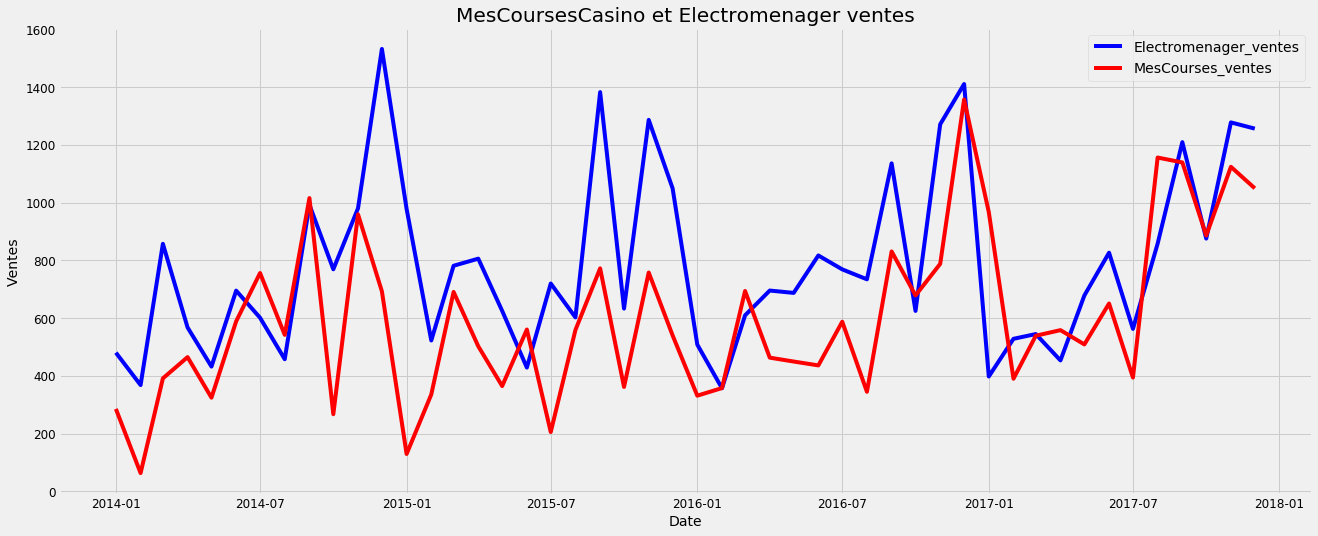

In [37]:
plt.figure(figsize=(20, 8))
plt.plot(store['Date_Commande'], store['Electromenager_ventes'], 'b-', label = 'Electromenager_ventes')
plt.plot(store['Date_Commande'], store['MesCourses_ventes'], 'r-', label = 'MesCourses_ventes')
plt.xlabel('Date'); plt.ylabel('Ventes'); plt.title('MesCoursesCasino et Electromenager ventes')
plt.legend();

Nous observons que les ventes d'Electromenager et de mes courses casino, suivent un schéma saisonnier similaire. Le début de l'année est la basse saison pour les deux catégories. Il semble que l'été soit également calme pour les ventes d'Electromenager. <br>

En outre, les ventes quotidiennes moyennes de la catégorie electromenager  sont supérieures à celles de la catégorie Mes courses casino, pendant la plupart des mois.  <br>
C'est compréhensible, car la valeur d'electromenager devrait être beaucoup plus élevée que celle des courses casino.

Il arrive que les ventes de mes courses casino dépassent les ventes quotidiennes moyennes de la catégorie electromenager . 

Essayons de savoir quand les ventes d'Electromenageront dépassé pour la première fois celles de MesCoursesCasino.

In [43]:
first_date = store.ix[np.min(list(np.where(store['Electromenager_ventes'] < store['MesCourses_ventes'])[0])), 'Date_Commande']

print("MesCourses la première fois a produit des ventes supérieures à la catégorie Electromenager is {}.".format(first_date.date()))

MesCourses la première fois a produit des ventes supérieures à la catégorie Electromenager is 2014-07-01.


### Time Series Modeling with Prophet

Documentation : https://github.com/facebook/prophet <br>
Publié par Facebook en 2017, l'outil de prévision Prophet est conçu pour analyser des séries chronologiques qui affichent des tendances sur différentes échelles de temps telles que l'année, la semaine et le jour. <br>


In [51]:
from fbprophet import Prophet

Il dispose également de capacités avancées pour modéliser les effets des vacances sur une série chronologique et mettre en œuvre des points de changement personnalisés. C'est pourquoi nous utilisons Prophet pour mettre en place un modèle.

In [55]:
Electromenager = Electromenager.rename(columns={'Date_Commande': 'ds', 'Montant': 'y'})
Electromenager_model = Prophet(interval_width=0.95)
Electromenager_model.fit(Electromenager)

MesCourses = MesCourses.rename(columns={'Date_Commande': 'ds', 'Montant': 'y'})
MesCourses_model = Prophet(interval_width=0.95)
MesCourses_model.fit(MesCourses)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [58]:
Electromenager_forecast = Electromenager_model.make_future_dataframe(periods=36, freq='MS')
Electromenager_forecast = Electromenager_model.predict(Electromenager_forecast)

MesCourses_forecast = MesCourses_model.make_future_dataframe(periods=36, freq='MS')
MesCourses_forecast = MesCourses_model.predict(MesCourses_forecast)

<Figure size 1296x432 with 0 Axes>

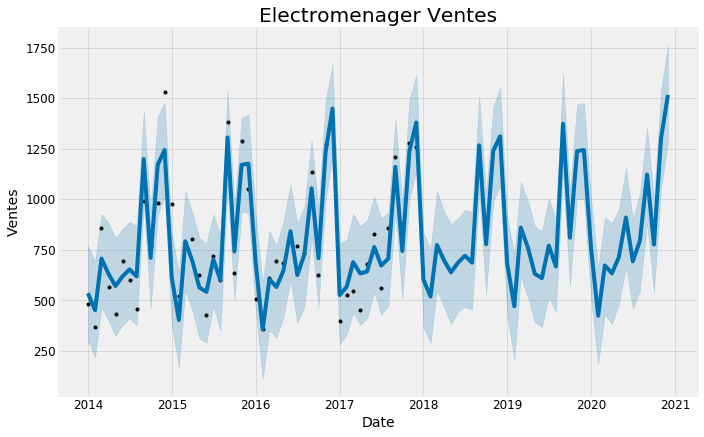

In [61]:
plt.figure(figsize=(18, 6))
Electromenager_model.plot(Electromenager_forecast, xlabel = 'Date', ylabel = 'Ventes')
plt.title('Electromenager Ventes');

<Figure size 1296x432 with 0 Axes>

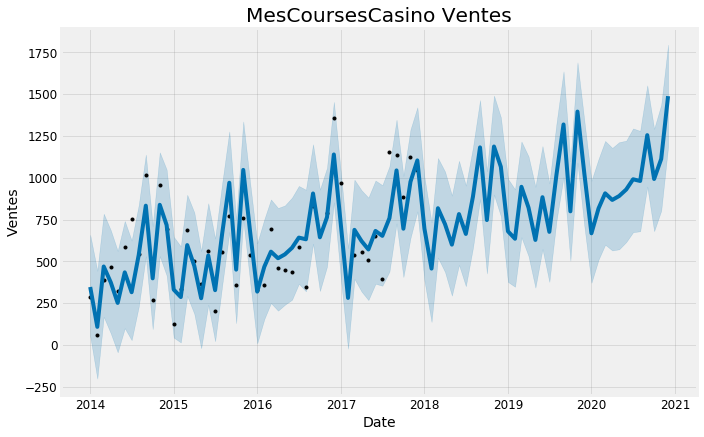

In [63]:
plt.figure(figsize=(18, 6))
MesCourses_model.plot(MesCourses_forecast, xlabel = 'Date', ylabel = 'Ventes')
plt.title('MesCoursesCasino Ventes');

### Comparer les prévisions

Nous avons déjà les prévisions pour trois ans pour ces deux catégories à l'avenir. Nous allons maintenant les réunir pour comparer leurs prévisions futures.

In [65]:
Electromenager_names                  = ['Electromenager_%s' % column for column in Electromenager_forecast.columns]
MesCourses_names                      = ['MesCourses_%s' % column for column in MesCourses_forecast.columns]

merge_Electromenager_forecast         = Electromenager_forecast.copy()
merge_MesCourses_forecast             = MesCourses_forecast.copy()

merge_Electromenager_forecast.columns = Electromenager_names
merge_MesCourses_forecast.columns     = MesCourses_names

forecast = pd.merge(merge_Electromenager_forecast, merge_MesCourses_forecast, how = 'inner',
                    left_on = 'Electromenager_ds', right_on = 'MesCourses_ds')

forecast = forecast.rename(columns={'Electromenager_ds': 'Date'}).drop('MesCourses_ds', axis=1)
forecast.head()

,Date,Electromenager_trend,Electromenager_yhat_lower,Electromenager_yhat_upper,Electromenager_trend_lower,Electromenager_trend_upper,Electromenager_additive_terms,Electromenager_additive_terms_lower,Electromenager_additive_terms_upper,Electromenager_yearly,...,MesCourses_additive_terms,MesCourses_additive_terms_lower,MesCourses_additive_terms_upper,MesCourses_yearly,MesCourses_yearly_lower,MesCourses_yearly_upper,MesCourses_multiplicative_terms,MesCourses_multiplicative_terms_lower,MesCourses_multiplicative_terms_upper,MesCourses_yhat
0,2014-01-01,726.057713,298.816383,769.366029,726.057713,726.057713,-190.685662,-190.685662,-190.685662,-190.685662,...,-140.040481,-140.040481,-140.040481,-140.040481,-140.040481,-140.040481,0.0,0.0,0.0,347.490278
1,2014-02-01,727.494023,219.108272,693.055641,727.494023,727.494023,-276.377703,-276.377703,-276.377703,-276.377703,...,-385.678283,-385.678283,-385.678283,-385.678283,-385.678283,-385.678283,0.0,0.0,0.0,109.240162
2,2014-03-01,728.791335,466.520102,928.645815,728.791335,728.791335,-22.389755,-22.389755,-22.389755,-22.389755,...,-31.379844,-31.379844,-31.379844,-31.379844,-31.379844,-31.379844,0.0,0.0,0.0,470.211349
3,2014-04-01,730.227645,397.567528,884.134995,730.227645,730.227645,-100.141158,-100.141158,-100.141158,-100.141158,...,-134.291690,-134.291690,-134.291690,-134.291690,-134.291690,-134.291690,0.0,0.0,0.0,374.687188
4,2014-05-01,731.617622,325.625745,808.415985,731.617622,731.617622,-160.815662,-160.815662,-160.815662,-160.815662,...,-263.821569,-263.821569,-263.821569,-263.821569,-263.821569,-263.821569,0.0,0.0,0.0,252.306682


### Visualiser la tendance et la prévision

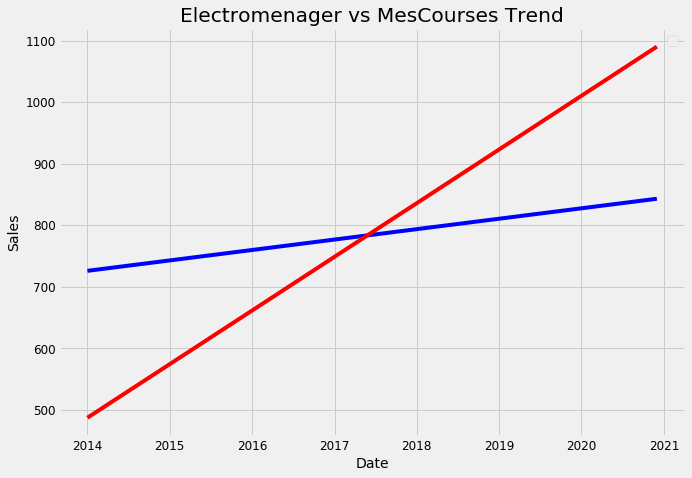

In [68]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['Electromenager_trend'], 'b-') 
plt.plot(forecast['Date'], forecast['MesCourses_trend'], 'r-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Sales')
plt.title('Electromenager vs MesCourses Trend');

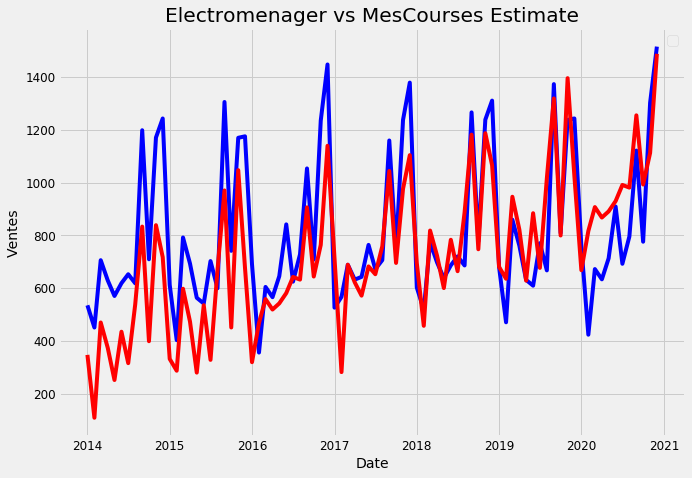

In [69]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['Electromenager_yhat'], 'b-')
plt.plot(forecast['Date'], forecast['MesCourses_yhat'], 'r-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Ventes')
plt.title('Electromenager vs MesCourses Estimation');

### Tendances et modèles (Tredns and patterns)

Maintenant, nous pouvons utiliser les Prophet Models pour examiner les différentes tendances de ces deux catégories dans les données.
https://towardsdatascience.com/an-overview-of-time-series-forecasting-models-a2fa7a358fcb

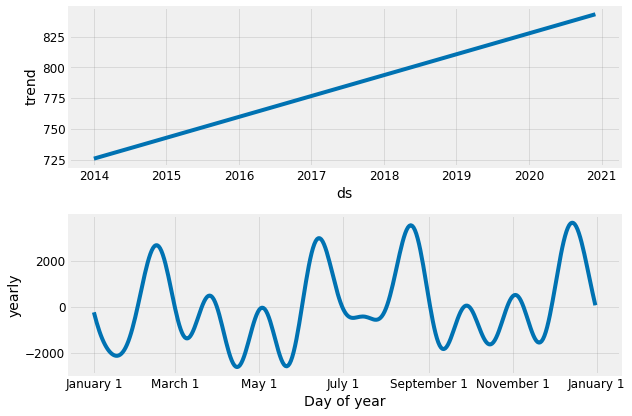

In [73]:
Electromenager_model.plot_components(Electromenager_forecast);

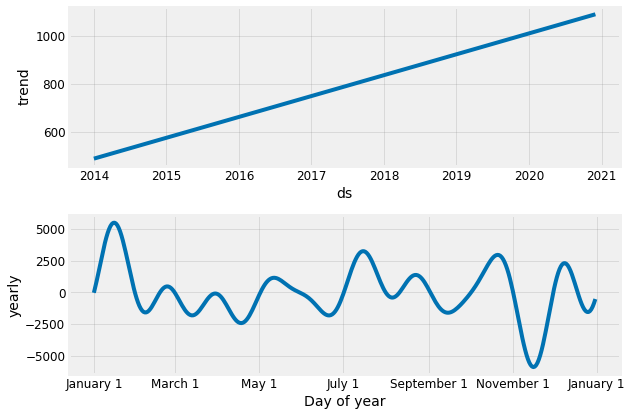

In [72]:
MesCourses_model.plot_components(MesCourses_forecast);

Il est bon de constater que les ventes d'electromenager et de MesCoursesCasino ont augmenté de façon linéaire au fil du temps, bien que la croissance des ventes de MesCourses semble un peu plus forte.

Le pire mois pour les ventes d'electromenager est avril, le pire mois pour les ventes MesCourses casino estnovembre

Le meilleure mois pour les ventes d'electromenager est : Septembre, Le meilleure mois pour les ventes MesCoursesCasino fevrier